# Requirements
- pandas
- numpy
- matplotlib
- seaborn

# Dataset
- Gait in Neurodegenerative Disease Database
- https://physionet.org/content/gaitndd/1.0.0/

In [1]:
folder = "/physionet/gait-in-neurodegenerative-disease-database-1.0.0"
import pandas as pd

headers = [
    "Elapsed Time (sec)",
    "Left Stride Interval (sec)",
    "Right Stride Interval (sec)",
    "Left Swing Interval (sec)",
    "Right Swing Interval (sec)",
    "Left Swing Interval (% of stride)",
    "Right Swing Interval (% of stride)",
    "Left Stance Interval (sec)",
    "Right Stance Interval (sec)",
    "Left Stance Interval (% of stride)",
    "Right Stance Interval (% of stride)",
    "Double Support Interval (sec)",
    "Double Support Interval (% of stride)"
]

class_dicts = {
    "park": 0,
    "hunt": 1,
    "control": 2, 
    "als": 4,
}


with open(f"{folder}/RECORDS") as f:
    records = f.readlines()
    records = [record.rstrip() for record in records]

dataframes = []
for record in records:
    data = pd.read_csv(f"{folder}/{record}.ts", sep="	", header=None)
    data.columns = headers
    data['Class'] = record
    data['Neurodegenerative Disease'] = [class_dicts[key] for key in class_dicts.keys() if key in record][0]
    dataframes.append(data)
    
df = pd.concat(dataframes)

assert len(df["Class"].unique()) == len(records)   # sanity check
assert len(df["Neurodegenerative Disease"].unique()) == 4   # sanity check

print(len(df.columns))
print(len(df))

small_df_2 = df[df['Neurodegenerative Disease'] == 0]
small_df_4 = df[df['Neurodegenerative Disease'] == 1]
df = pd.concat([small_df_2, small_df_4])

15
15160


In [2]:
import seaborn as sns
small_df = df[["Neurodegenerative Disease", "Left Swing Interval (% of stride)", "Right Swing Interval (% of stride)", "Elapsed Time (sec)"]]

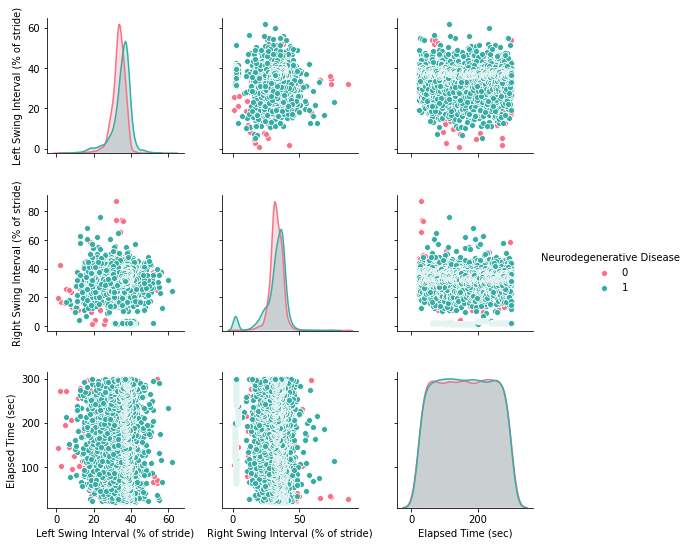

In [3]:
# Plot pairwise relationships in a dataset.
sns.pairplot(small_df, hue="Neurodegenerative Disease", palette="husl")

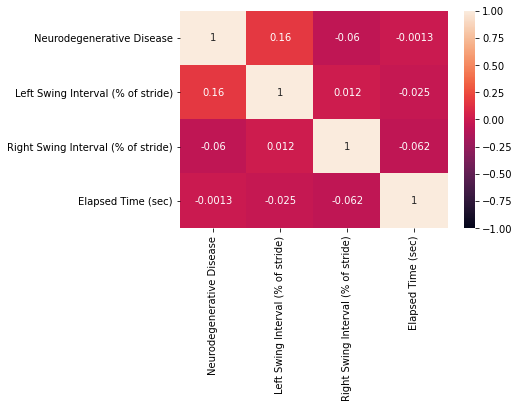

In [5]:
sns.heatmap(small_df.corr(), annot=True, vmin=-1, vmax=1)

# Grey Relational Analysis
- Determine the correlation among different factors or to build classification/prediction model
- Grey colour indicates the amount of known information in the prediction mechanism.

### Grey relational coefficient (GRC) and grey relational grade (GRG) 
- Similar to correlation coefficient
- Measure the absolute distance between reference projects and comparative projects via GRA
- Defined by Deng [1]
- The larger the grey relational coefficient, the closer xij and x0j are. 

----
- [1] Deng, J.L.: Controls problems on grey system. Syst. Control Lett. 1(5), 288–294 (1982)
- Yiyo Kuo; Taho Yang; Guan-Wei.: Huang The use of a grey-based Taguchi method for optimizing multi-response simulation problems
- https://programmer.group/5e4b66268a670.html

In [11]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np


class GrayRelationalCoefficient():
    
    def __init__(self, data, tetha=0.5, standard=True):
        '''
        data: Input matrix, vertical axis is attribute name, first column is parent sequence
        theta: Resolution coefficient, range 0~1，Generally take 0.5，The smaller the correlation coefficient is, the greater the difference is, and the stronger the discrimination ability is
        standard: Need standardization
        '''
        self.data = np.array(data)
        self.tetha = tetha
        self.standard = standard

    def get_calculate_relational_coefficient(self, parent_column=0):
        self.normalize()
        return self._calculate_relational_coefficient(parent_column)
        
    def normalize(self):
        if not self.standard:
            return None
        
        self.scaler = StandardScaler().fit(self.data) 
        self.data = self.scaler.transform(self.data)
        
    def _calculate_relational_coefficient(self, parent_column):
        momCol = self.data[:,parent_column].copy()
        sonCol = self.data[:,0:]

        for col in range(sonCol.shape[1]):           
            sonCol[:,col] = abs(sonCol[:,col]-momCol)

        minMin = np.nanmin(sonCol)
        maxMax = np.nanmax(sonCol)

        #Calculation of correlation coefficient matrix
        cors = (minMin + (self.tetha * maxMax))/(sonCol + (self.tetha * maxMax))
        return cors



In [15]:
import matplotlib.pyplot as plt

def plot_average_grey_relational_coefficient(mean_cors, columns, label='Label'):
    plt.rcParams['font.sans-serif']=['SimHei'] 
    #Used to display negative sign normally
    plt.rcParams['axes.unicode_minus']=False

    #Visualization matrix
    plt.clf()
    plt.figure(figsize=(8,12))
    sns.heatmap(mean_cors.reshape(1,-1), square=True, annot=True,  cbar=False,
                vmax=1.0, linewidths=0.1,cmap='viridis')
    plt.yticks([0,],[label])
    plt.xticks(np.arange(0.5,12.5,1), columns, rotation=90)
    plt.title('Index correlation matrix')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


<Figure size 432x288 with 0 Axes>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


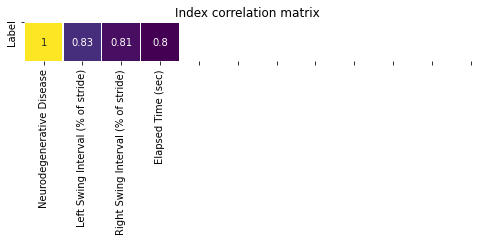

In [16]:
model = GrayRelationalCoefficient(small_df, standard=True)
cors = model.get_calculate_relational_coefficient()

mean_cors = cors.mean(axis=0)
columns = small_df.columns

plot_average_grey_relational_coefficient(mean_cors, columns)

<Figure size 432x288 with 0 Axes>

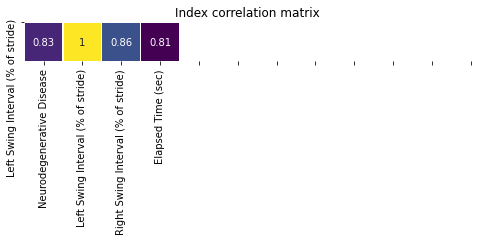

In [17]:
model = GrayRelationalCoefficient(small_df, standard=True)
cors = model.get_calculate_relational_coefficient(parent_column=1)

mean_cors = cors.mean(axis=0)
columns = small_df.columns

plot_average_grey_relational_coefficient(mean_cors, columns, label=columns[1])

<Figure size 432x288 with 0 Axes>

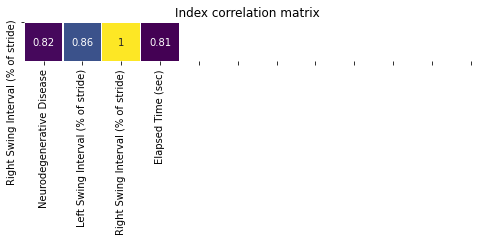

In [18]:
model = GrayRelationalCoefficient(small_df, standard=True)
cors = model.get_calculate_relational_coefficient(parent_column=2)

mean_cors = cors.mean(axis=0)
columns = small_df.columns

plot_average_grey_relational_coefficient(mean_cors, columns, label=columns[2])

<Figure size 432x288 with 0 Axes>

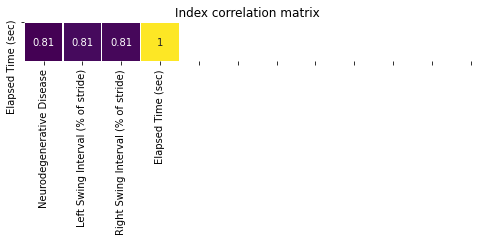

In [19]:
model = GrayRelationalCoefficient(small_df, standard=True)
cors = model.get_calculate_relational_coefficient(parent_column=3)

mean_cors = cors.mean(axis=0)
columns = small_df.columns

plot_average_grey_relational_coefficient(mean_cors, columns, label=columns[3])

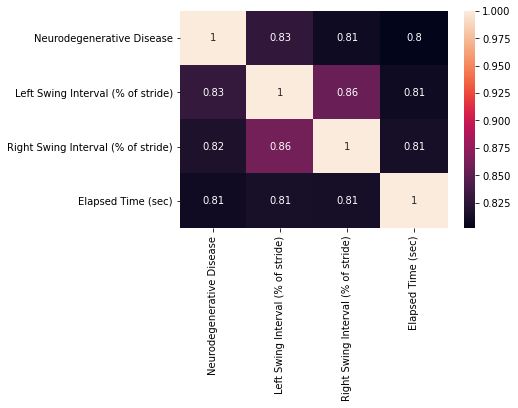

In [20]:
K = len(small_df.columns)
correl = []
for i in range(K):
    model = GrayRelationalCoefficient(small_df, standard=True)
    cors = model.get_calculate_relational_coefficient(parent_column=i)
    mean_cors = cors.mean(axis=0)
    correl.append(mean_cors)

sns.heatmap(correl, annot=True, xticklabels=small_df.columns, yticklabels=small_df.columns) # cmap="YlGnBu"